## import

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

## 검증데이터

In [2]:
data = {'model': ['KerasANN','KerasANN', 'KerasANN','KerasANN',
                  'RandomForest','RandomForest', 'RandomForest','RandomForest',
                  'XGBoost','XGBoost','XGBoost','XGBoost'],
        'flow_pop': ['No', 'No','Yes', 'Yes',
                     'No', 'No','Yes', 'Yes',
                     'No', 'No','Yes', 'Yes'],
        'val_method': ['K-fold', 'TimeSeries','K-fold', 'TimeSeries',
                       'K-fold', 'TimeSeries','K-fold', 'TimeSeries',
                       'K-fold', 'TimeSeries','K-fold', 'TimeSeries'],
        'RMSE' : [27.856,0,23.430,0,
                  15.852,15.511,15.351,15.274,
                  16.412,16.143,15.992,15.575]}
validate = pd.DataFrame(data)
validate

,model,flow_pop,val_method,RMSE
0,KerasANN,No,K-fold,27.856
1,KerasANN,No,TimeSeries,0.000
2,KerasANN,Yes,K-fold,23.430
3,KerasANN,Yes,TimeSeries,0.000
4,RandomForest,No,K-fold,15.852
5,RandomForest,No,TimeSeries,15.511
6,RandomForest,Yes,K-fold,15.351
7,RandomForest,Yes,TimeSeries,15.274
8,XGBoost,No,K-fold,16.412
9,XGBoost,No,TimeSeries,16.143


### K-fold 교차검증

In [19]:
validate[(validate['flow_pop']=='Yes') & (validate['val_method']=='K-fold')]

,model,flow_pop,val_method,RMSE
2,KerasANN,Yes,K-fold,23.430
6,RandomForest,Yes,K-fold,15.351
10,XGBoost,Yes,K-fold,15.992


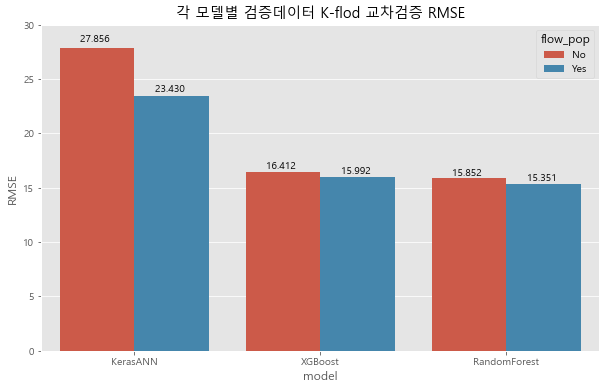

In [21]:
plt.figure(figsize=(10,6))
plt.title('각 모델별 검증데이터 K-flod 교차검증 RMSE')
ax = sns.barplot(x = 'model', y = 'RMSE', hue = 'flow_pop', 
            data=validate[validate['val_method']=='K-fold'].sort_values('RMSE',ascending=False))

plt.ylim(0,30)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.3f "%(height), (left+width/2, height*1.02), ha='center')

plt.show()

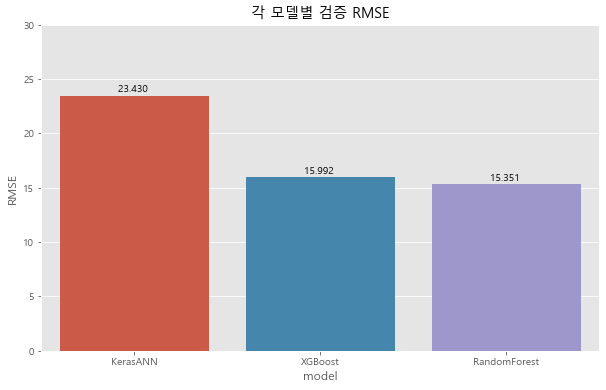

In [23]:
plt.figure(figsize=(10,6))
plt.title('각 모델별 검증 RMSE')
ax = sns.barplot(x = 'model', y = 'RMSE', 
            data=validate[(validate['flow_pop']=='Yes') & (validate['val_method']=='K-fold')].sort_values('RMSE',ascending=False))

plt.ylim(0,30)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.3f "%(height), (left+width/2, height*1.02), ha='center')

plt.show()

### 시계열 분할검증

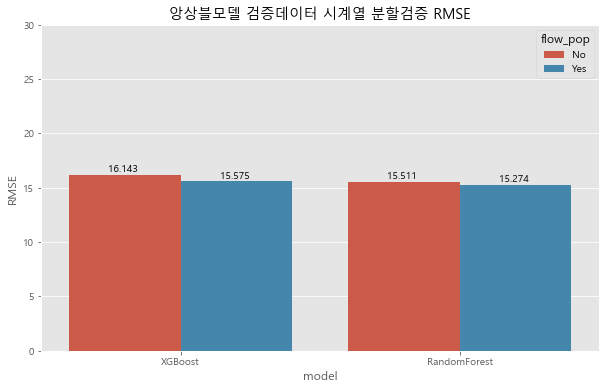

In [120]:
plt.figure(figsize=(10,6))
plt.title('앙상블모델 검증데이터 시계열 분할검증 RMSE')
ax = sns.barplot(x = 'model', y = 'RMSE', hue = 'flow_pop',
            data=validate[(validate['val_method']=='TimeSeries') & (validate['RMSE']>0)].sort_values('RMSE',ascending=False))

plt.ylim(0,30)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.3f "%(height), (left+width/2, height*1.02), ha='center')

plt.show()

## 전체데이터

In [90]:
data = {'model': ['KerasANN','KerasANN', 'KerasANN','KerasANN',
                  'RandomForest','RandomForest', 'RandomForest','RandomForest',
                  'XGBoost','XGBoost','XGBoost','XGBoost'],
        'flow_pop': ['No', 'No','Yes', 'Yes',
                     'No', 'No','Yes', 'Yes',
                     'No', 'No','Yes', 'Yes'],
        'val_method': ['K-fold', 'TimeSeries','K-fold', 'TimeSeries',
                       'K-fold', 'TimeSeries','K-fold', 'TimeSeries',
                       'K-fold', 'TimeSeries','K-fold', 'TimeSeries'],
        'RMSE' : [23.614,0,22.306,0,
                  9.841,12.300,9.864,9.531,
                  9.726,8.744,9.317,8.419]}
total = pd.DataFrame(data)
total

,model,flow_pop,val_method,RMSE
0,KerasANN,No,K-fold,23.614
1,KerasANN,No,TimeSeries,0.000
2,KerasANN,Yes,K-fold,22.306
3,KerasANN,Yes,TimeSeries,0.000
4,RandomForest,No,K-fold,9.841
5,RandomForest,No,TimeSeries,12.300
6,RandomForest,Yes,K-fold,9.864
7,RandomForest,Yes,TimeSeries,9.531
8,XGBoost,No,K-fold,9.726
9,XGBoost,No,TimeSeries,8.744


### K-fold 교차검증

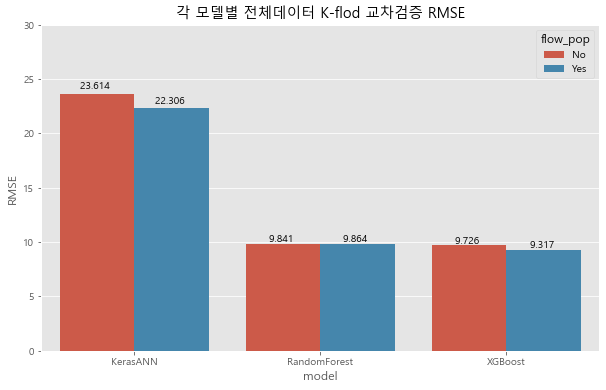

In [118]:
plt.figure(figsize=(10,6))
plt.title('각 모델별 전체데이터 K-flod 교차검증 RMSE')
ax = sns.barplot(x = 'model', y = 'RMSE', hue = 'flow_pop', 
            data=total[total['val_method']=='K-fold'].sort_values('RMSE',ascending=False))

plt.ylim(0,30)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.3f "%(height), (left+width/2, height*1.02), ha='center')

plt.show()

### 시계열 분할검증

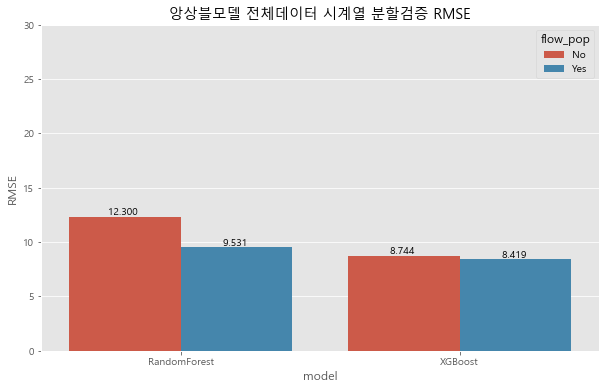

In [119]:
plt.figure(figsize=(10,6))
plt.title('앙상블모델 전체데이터 시계열 분할검증 RMSE')
ax = sns.barplot(x = 'model', y = 'RMSE', hue = 'flow_pop',
            data=total[(total['val_method']=='TimeSeries') & (total['RMSE']>0)].sort_values('RMSE',ascending=False))

plt.ylim(0,30)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.3f "%(height), (left+width/2, height*1.02), ha='center')

plt.show()